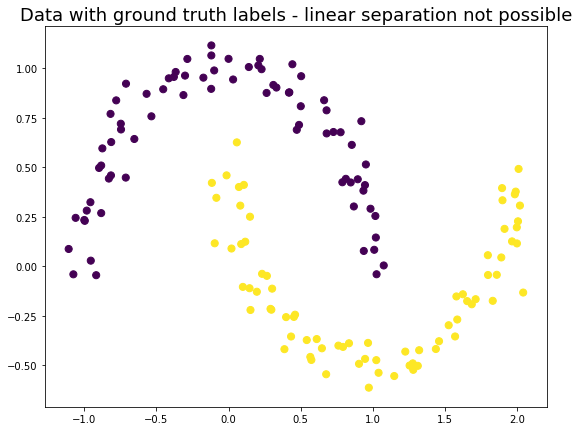

In [5]:
import warnings
warnings.filterwarnings("ignore") 

import time
import pandas as pd
import numpy as np
# suppress scientific float notation
np.set_printoptions(precision=5, suppress=True)  
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_moons
random_state = 21
cmap = 'viridis'
dot_display_size = 50
X_mn, y_mn = make_moons(150, noise=.07, random_state=random_state)
fig, ax = plt.subplots(figsize=(9,7))
ax.set_title('Data with ground truth labels', fontsize=18)
ax.scatter(X_mn[:, 0], X_mn[:, 1],c=y_mn,s=dot_display_size, cmap=cmap)

In [6]:
from sklearn.neighbors import radius_neighbors_graph
from sklearn.neighbors import kneighbors_graph
import scipy
from sklearn.cluster import KMeans

class spectral_clustering:
    
    def __init__(self, n_clusters=2, affinity='radius_neighbors',assign_labels='kmeans'):
        self.n_clusters = n_clusters
        self.affinity = affinity
        self.assign_labels = assign_labels
    
    def build_graph(self,affinity, data, radius, k):
        graph = []
        if affinity =="radius_neighbors":
            # euclidean_distance (l2) for p = 2
            graph = radius_neighbors_graph(data,radius,mode='distance', metric='minkowski',
                                           p=2, metric_params=None, include_self=False)
        elif affinity == "nearest_neighbors":
            # make it same as sk-learn
            graph = kneighbors_graph(data, n_neighbors=k, mode='connectivity', metric='minkowski', p=2, 
                                            include_self=True)
            graph = 0.5 * (graph + graph.T)
            
        return graph
    
    def fit(self, data):
        # 1. construct graph(similarity matrix) from input datapoints
        result_graph = self.build_graph(self.affinity, data, radius=0.4, k=10).toarray()
        self.affinity_matrix_ = result_graph
        print(result_graph.shape)
        print(result_graph[:5,:5])
        # 2. Laplacian matrix
        self.laplacian_matrix = scipy.sparse.csgraph.laplacian(result_graph, normed=False)
        print(self.laplacian_matrix[:5,:5])
        # 3. getting k smallest eignvalue of Graph laplacian matrix
        eigenValues, eigenVectors = np.linalg.eig(self.laplacian_matrix)
        print(eigenValues.shape)
        print(eigenVectors.shape)
        # np.argsort give index for sorting
        sortedEigenValueSwitchIndex = np.argsort(eigenValues.real)
        # result is small to large eigenvalues
        sortedEigenValues = eigenValues[sortedEigenValueSwitchIndex]
        sortedEigenVectors = eigenVectors[:,sortedEigenValueSwitchIndex].real
        sortedEigenVectors = sortedEigenVectors[:,:self.n_clusters]
        print(sortedEigenValues[:self.n_clusters])
        print(sortedEigenVectors.shape)
        # final eignvectors
        self.final_smallest_graph_laplacian_eigenvalue = sortedEigenValues[:self.n_clusters]
        self.final_sortedEigenVectors_corresponeding_to_eigenvalue = sortedEigenVectors
        # 4. fit with kmeans
        if self.assign_labels == 'kmeans':
            self.result_label = KMeans(self.n_clusters,n_init=10).fit_predict(sortedEigenVectors)
        


(150, 150)
[[0.      0.      0.      0.      0.23956]
 [0.      0.      0.      0.      0.     ]
 [0.      0.      0.      0.      0.     ]
 [0.      0.      0.      0.      0.     ]
 [0.23956 0.      0.      0.      0.     ]]
[[ 3.88927 -0.      -0.      -0.      -0.23956]
 [-0.       3.40127 -0.      -0.      -0.     ]
 [-0.      -0.       3.00487 -0.      -0.     ]
 [-0.      -0.      -0.       3.45832 -0.     ]
 [-0.23956 -0.      -0.      -0.       4.06569]]
(150,)
(150, 150)
[0.      0.03099]
(150, 2)


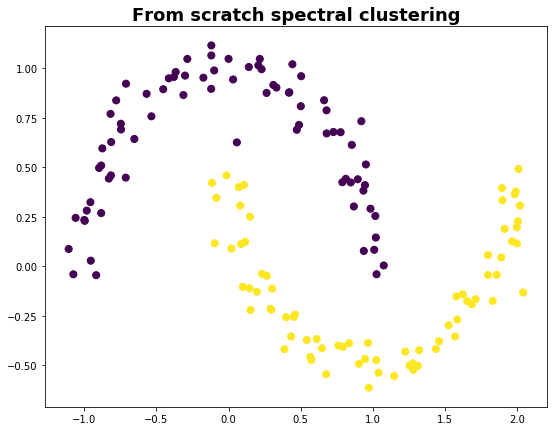

In [9]:
model = spectral_clustering(n_clusters=2, affinity='radius_neighbors',assign_labels='kmeans')
model.fit(X_mn)
labels = model.result_label
fig, ax = plt.subplots(figsize=(9,7))
ax.set_title('From scratch spectral clustering', fontsize=18, fontweight='demi')
ax.scatter(X_mn[:, 0], X_mn[:, 1],c=labels,s=dot_display_size, cmap=cmap)

(150, 150)
[[1.  0.  0.  0.  0.5]
 [0.  1.  0.  0.  0. ]
 [0.  0.  1.  0.  0. ]
 [0.  0.  0.  1.  0. ]
 [0.5 0.  0.  0.  1. ]]


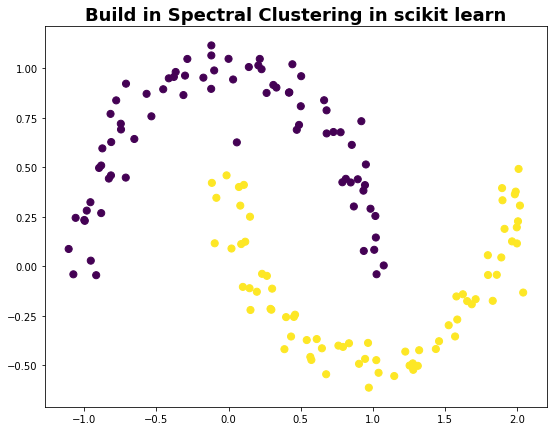

In [8]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels="kmeans")
model.fit(X_mn)
print(model.affinity_matrix_.shape)
print(model.affinity_matrix_.toarray()[:5,:5])
labels = model.labels_

fig, ax = plt.subplots(figsize=(9,7))
ax.set_title('Build in Spectral Clustering in scikit learn', fontsize=18, fontweight='demi')
plt.scatter(X_mn[:, 0], X_mn[:, 1], c=labels, s=dot_display_size, cmap=cmap)

In [ ]:
# test
test = np.array([5,3,8,7,1,2,4])
vector = np.array([[1,5,1,1,1,1,1], [2,3,1,1,1,1,1],[3,8,1,1,1,1,1],
                   [4,7,1,1,1,1,1],[5,1,1,1,1,1,1],[6,2,1,1,1,1,1],[7,4,1,1,1,1,1]])
switchIndex = np.argsort(test)
print(switchIndex)
sorted_test = test[switchIndex]
print(sorted_test)
sorted_test_vector = vector[:,switchIndex]
print(sorted_test_vector)
print(sorted_test[4:])
print(sorted_test_vector[:,4:])